In [43]:
# plot quality adjusted citations

In [44]:
import pandas as pd
import numpy as np

# first, try to plot it using PCA
from time import time

%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()

import sklearn
from imblearn.under_sampling import RandomUnderSampler
import scipy

In [45]:
v6 = pd.read_pickle(
    '/pool001/lraymond/processed_data/pre_analysis_dfs/standardized_linear_classifier_df.p')

In [30]:
year_cols = [x for x in v6.columns if x.startswith('cat_grant_year')]

In [39]:
svc = sklearn.svm.SVC(kernel='sigmoid', C=.5, probability=True, max_iter=40000)

FileNotFoundError: [Errno 2] No such file or directory: '~/plots/ROC_sigmoid.png'

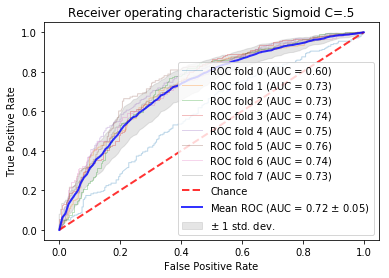

In [41]:
tprs = []
aucs = []
i = 0
mean_fpr = np.linspace(0, 1, 100)
cv = sklearn.model_selection.StratifiedKFold(n_splits=8)

for train, test in cv.split(X_resampled, y_resampled):
    probas_ = svc.fit(X_resampled[train], y_resampled[train]).predict_proba(X_resampled[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_resampled[test], probas_[:, 1])
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

mean_fpr = np.linspace(0, 1, 100)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Sigmoid C=.5')
plt.legend(loc="lower right")
plt.savefig('ROC_sigmoid.png')
plt.show()

In [42]:
plt.savefig('ROC_sigmoid.png')
plt.show()

svm = sklearn.svm.SVC(
    kernel='sigmoid', C=1.0, max_iter=20000, random_state=RANDOM_STATE, probability=True)
print(X_train.shape, y_train.shape)
svm.fit(X_train, y_train)

In [46]:
RANDOM_STATE = 0

Y_col = '10_year_cites_top1'
X_cols = [c for c in v6.columns if '_cites' not in c]

In [47]:
# we want a 1:1 ratio in each class 
rus = RandomUnderSampler(sampling_strategy=1, return_indices=True, random_state=0)


X = v6[X_cols].as_matrix()
Y = v6[Y_col].as_matrix().reshape(-1)
print(X.shape, Y.shape)

X_resampled, y_resampled, ind = rus.fit_resample(X, Y)

print(X_resampled.shape, y_resampled.shape)


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X_resampled, y_resampled, test_size=0.5, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)

(188672, 166) (188672,)
(3854, 166) (3854,)
(1927, 166) (1927, 166)


In [50]:
svc = sklearn.svm.SVC(kernel='sigmoid', C=1, probability=True, max_iter=40000)

In [51]:
svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=40000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
probs = svc.predict_proba(X)

In [61]:
probs.shape

(188672, 2)

In [98]:
pred = pd.DataFrame(index=v6.index, data={'probabilities': probs[:, 1] , '10_year_cites': v6['10_year_cites']})

In [99]:
pred['pred_quantile'] = pd.qcut(pred['probabilities'], q=5, labels=False)

In [100]:
pred['pred_quantile'].describe()

count    188672.000000
mean          2.000000
std           1.414225
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: pred_quantile, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab890ce588>,
      dtype=object)

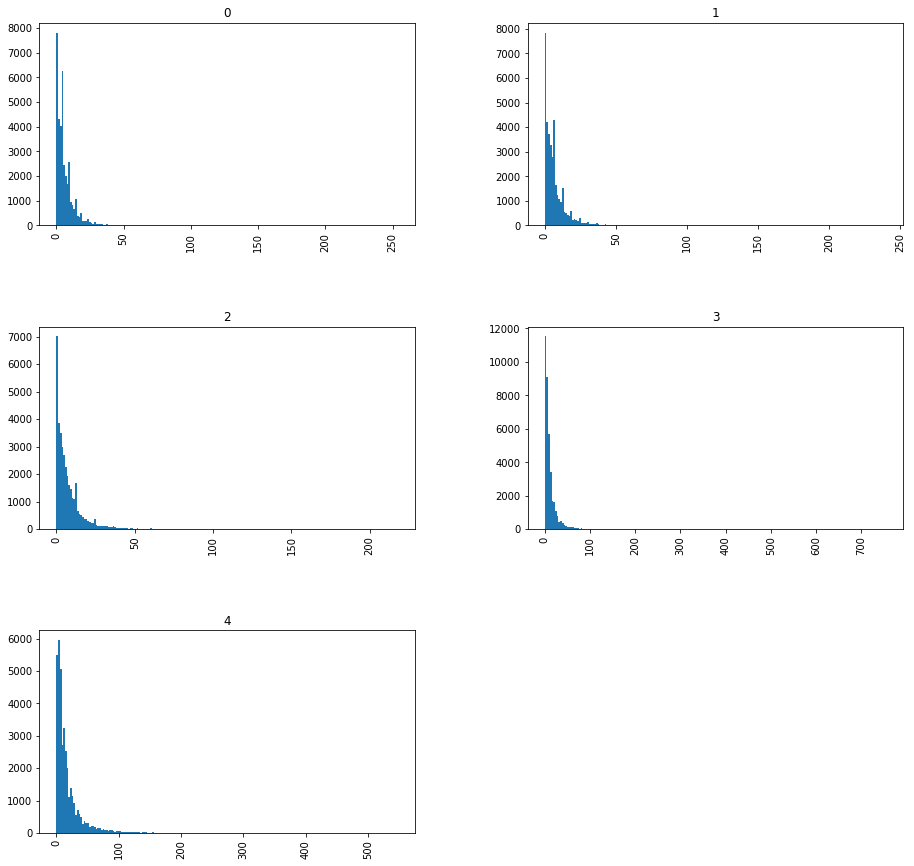

In [111]:
pred[['pred_quantile', '10_year_cites']].hist(
    column='10_year_cites', by='pred_quantile', figsize=(15,15), layout=(3, 2), bins=200, )

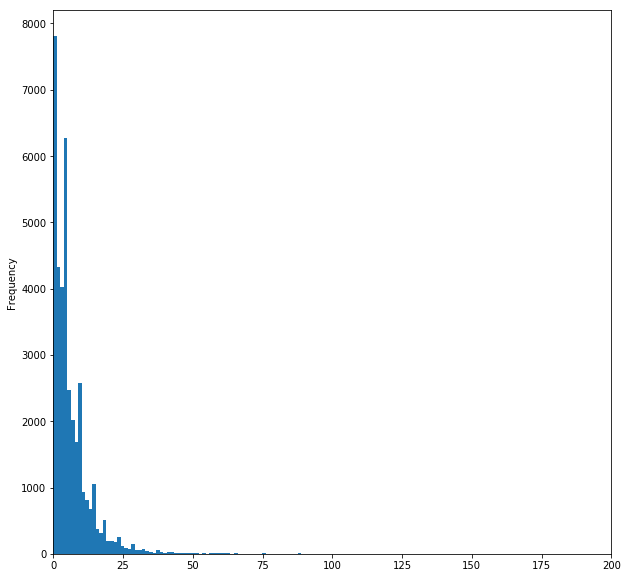

In [122]:
pred.loc[pred['pred_quantile']==0, '10_year_cites'].plot.hist(bins=200, figsize=(10,10), xlim=(0,200))

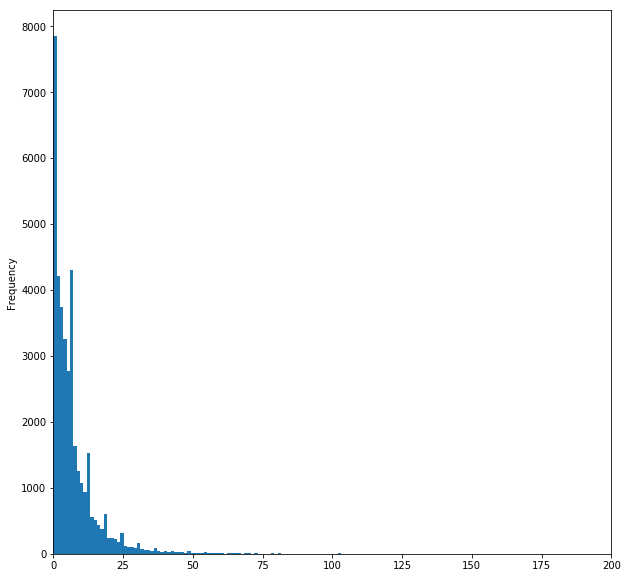

In [119]:
pred.loc[pred['pred_quantile']==1, '10_year_cites'].plot.hist(bins=200, figsize=(10,10), xlim=(0,200))

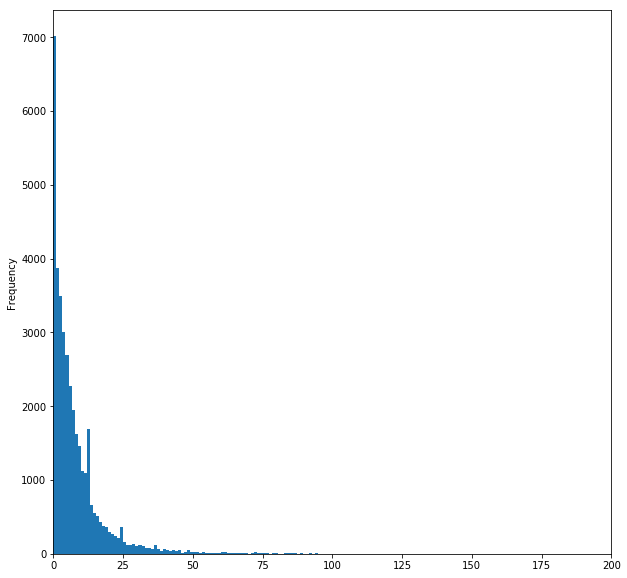

In [120]:
pred.loc[pred['pred_quantile']==2, '10_year_cites'].plot.hist(bins=200, figsize=(10,10), xlim=(0,200))

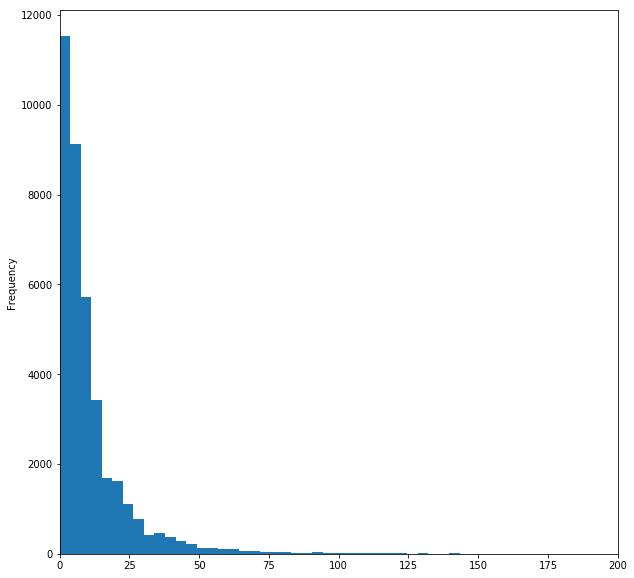

In [121]:
pred.loc[pred['pred_quantile']==3, '10_year_cites'].plot.hist(bins=200, figsize=(10,10), xlim=(0,200))

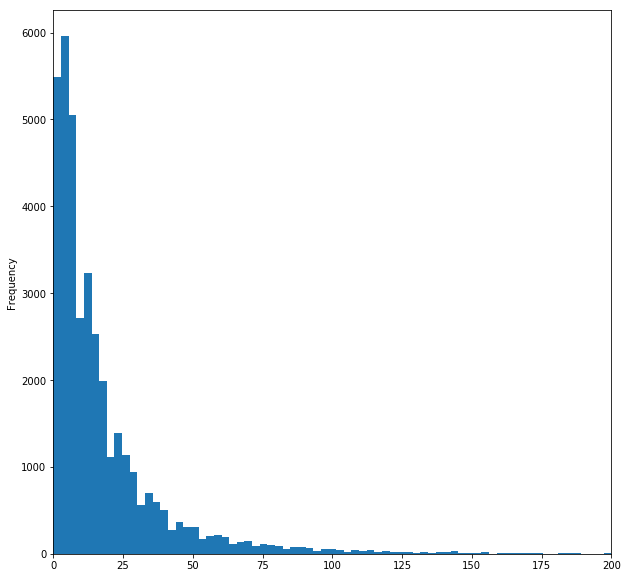

In [124]:
pred.loc[pred['pred_quantile']==4, '10_year_cites'].plot.hist(bins=200, figsize=(10,10), xlim=(0,200))

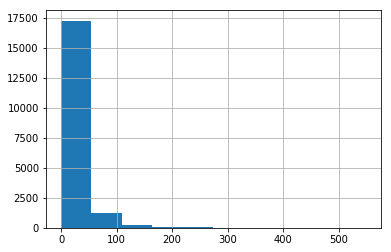

In [92]:
pred.loc[pred['pred_quantile']==9, '10_year_cites'].hist()

In [93]:
pred.loc[pred['pred_quantile']==9, '10_year_cites'].describe()

count    18868.000000
mean        20.989453
std         28.495564
min          0.000000
25%          5.000000
50%         12.000000
75%         26.000000
max        548.000000
Name: 10_year_cites, dtype: float64

In [23]:
%time
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('rbf', 'sigmoid'), 'C': [.5, 1, 5, 10, 20]}
svc = sklearn.svm.SVC(max_iter=40000)
clf = GridSearchCV(svc, parameters, cv=3, error_score=1)
clf.fit(X_resampled, y_resampled)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 22.2 µs


GridSearchCV(cv=3, error_score=1,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=40000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('rbf', 'sigmoid'), 'C': [0.5, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.172648,0.509176,0.510898,0.795409,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",2,0.487558,0.802570,0.583333,0.785214,0.461838,0.798444,0.043416,0.021040,0.052266,0.007403
1,1.128650,0.517398,0.513233,0.776988,0.5,sigmoid,"{'C': 0.5, 'kernel': 'sigmoid'}",1,0.496890,0.789330,0.590343,0.768872,0.452492,0.772763,0.051986,0.027423,0.057439,0.008871
2,1.049410,0.467407,0.498184,0.806825,1,rbf,"{'C': 1, 'kernel': 'rbf'}",5,0.465008,0.808801,0.566978,0.800389,0.462617,0.811284,0.028511,0.016922,0.048636,0.004662
3,1.032943,0.466686,0.510119,0.783082,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",3,0.479005,0.782710,0.578660,0.775875,0.472741,0.790661,0.059905,0.027610,0.048514,0.006042
4,0.939450,0.403221,0.451479,0.826805,5,rbf,"{'C': 5, 'kernel': 'rbf'}",8,0.424572,0.833333,0.481308,0.820233,0.448598,0.826848,0.034973,0.014515,0.023255,0.005348
5,0.787966,0.349025,0.506746,0.767126,5,sigmoid,"{'C': 5, 'kernel': 'sigmoid'}",4,0.472784,0.771417,0.545171,0.745525,0.502336,0.784436,0.046802,0.017400,0.029720,0.016172
6,0.912673,0.386615,0.437727,0.838223,10,rbf,"{'C': 10, 'kernel': 'rbf'}",9,0.410575,0.847741,0.457944,0.828794,0.444704,0.838132,0.035045,0.013598,0.019959,0.007736
7,0.697014,0.310118,0.490140,0.758950,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",6,0.448678,0.752726,0.536604,0.749027,0.485202,0.775097,0.038307,0.016712,0.036070,0.011517
8,0.922265,0.374461,0.432797,0.848731,20,rbf,"{'C': 20, 'kernel': 'rbf'}",10,0.409798,0.858255,0.444704,0.842023,0.443925,0.845914,0.024093,0.012778,0.016279,0.006920
9,0.660105,0.289640,0.478204,0.752467,20,sigmoid,"{'C': 20, 'kernel': 'sigmoid'}",7,0.426905,0.759735,0.526480,0.733463,0.481308,0.764202,0.040439,0.012946,0.040716,0.013561


In [ ]:
svm = sklearn.svm.SVC(
    kernel='sigmoid', C=1.0, max_iter=20000, random_state=RANDOM_STATE, probability=True)
print(X_train.shape, y_train.shape)
svm.fit(X_train, y_train)

In [ ]:
score = s

In [ ]:
# then, score the test set and bucket by score percentile, for each percentile, plot the histogram of citations
# for each, calculate the residual of the quality score- by proportion
# then, 
# outline for presentation - notes on SVM
- logic outline for "easier to predict" 
- notes on comp theory
- outstanding questions for stephanie
- results on tuning of the SVM
- pictures of margin plots
- pictures of PCA decompositions
- quality adjusted citation plots